# Advanced Challenge: Quantum Computational Supremacy

While algorithms like Shor's factoring, and Grover Search give us 'provable' Quantum Speedups
for the problems of factoring large numbers and searching unstructured databases respectively with the following speedups:

Shor (to factor an integer N): 
   1.  Quantum: $\mathcal{O}\left((\log N)^2\log\log N \log\log\log N\right)$ - Polynomial in $\log N$
   2.  Classical: $\mathcal{O}\left(\exp\left(1.9(\log N)^{\frac{1}{3}}(\log \log N)^\frac{2}{3}\right)\right)$ 
       -Exponential in $\log N$
   
Grover (to search an unstructured database of size $N$):
   1.  Quantum: $\mathcal{O}\left(\sqrt{N}\right)$
   2.  Classical: $\mathcal{O}\left(N\right)$
   
However, both of these algorithms are not suitable to demonstrate these speedups on **near-term** hardware. A recent estimate required 20 million (noisy) qubits to factor 2048 bit [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem))in 8 hours:  https://arxiv.org/abs/1905.09749

In contrast, we currently have [16](https://www.rigetti.com/qpu) to [72](https://ai.google/research/teams/applied-science/quantum-ai/) which is singnificantly less than 20 million...

However, as you will have seen in the talks, we aim for a problem which is not as useful as factoring, or search, but which we can *prove* (almost) provides an exponential speedup.

The problem in question is sampling from the output distribution of a quantum circuit.
This is very easy for Quantum Computers, they are natural samplers since they are fundamentally random. 
The measurement of a quantum state produces a sample from the possible outcomes of the circuit.

For example, we can easily sample from the uniform distribution over binary strings of length $n$.

# Challenge (Preliminary): 
Construct a sampler using a Quantum circuit which samples from the uniform distribution over binary strings of length $n$, i.e. each possible string, $\mathbf{x} \in \{0, 1\}^n$ occurs with *equal probability*, $\frac{1}{2^n}$

In [ ]:
from pyquil import Program
from pyquil.api import get_qc, WavefunctionSimulator, local_qvm
from pyquil.gates import *
import numpy as np
import os, inspect, sys
import random as rand
import sys
sys.path.insert(0, 'tests/')
sys.path.insert(0, 'auxiliary_functions/')

make_wf = WavefunctionSimulator()
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def uniform_sampler(n):
    circuit = Program()
    circuit += #Add code here
    return sample

However, the sampler you just constructed could be simulated by a classical computer!!

For each bit, $i$, of the string, $\mathbf{x} = x_1x_2\dots x_n$, flip a coin, 
   1. If coin = heads $\implies x_i = 0$
   2. if coin = tails $\implies x_i = 1$
   
We need to use the fact that we get correlations from quantum systems via entanglement, which we cannot reproduce by any classical process.

There are several proposals for some families of circuits which could be run on near term quantum devices, but which cannot be simulated by any classical means.

The leading examples are:
   1. Random Circuit Sampling:  [The original Google proposal](https://arxiv.org/abs/1608.00263),[Proof of classical hardness](https://arxiv.org/abs/1608.00263)
   2. Instantaneous Quantum Polynomial Time (IQP) circuit [The original proposal](https://royalsocietypublishing.org/doi/full/10.1098/rspa.2008.0443),   [Proofs of hardness](https://quantum-journal.org/papers/q-2017-04-25-8/), [Another](https://arxiv.org/abs/1504.07999), [And Another](https://royalsocietypublishing.org/doi/full/10.1098/rspa.2010.0301) 
   3. BosonSampling (Sampling from the output distribution of a linear optical computation) [Proposal and Hardness Proofs](https://dl.acm.org/citation.cfm?id=1993682)
   4. and others.
   
Number 3 deals with a different model of Quantum Computation which is beyond the scope of this event, but we will
take a look at IQP circuits, and random circuit sampling which are both based in the circuit model.

# Challenge: Instantaneous Quantum Polynomial Time (IQP) Computations

Next, we will look at the sub-universal class of computations known as Instantaneous Quantum Polynomal time computations devised by Shephard and Bremner.

**Instantaneous**: All the gates in the (intermediate) circuit commute with each other, meaning they can be applied in any order, or in other words, they can all be applied 'instantanteously' as one effective computation, in one time step.

**Quantum**: For obvious reasons..

**Polynomial Time**: The computation still runs in time polynomial in the size of the input (it's just a restricted version of $\mathsf{BQP}$)

As seen below, each qubit gets measured once at the end of the computation, and it is believed that no classical algorithm exists to replicate this procedure in **any reasonable amount of time**


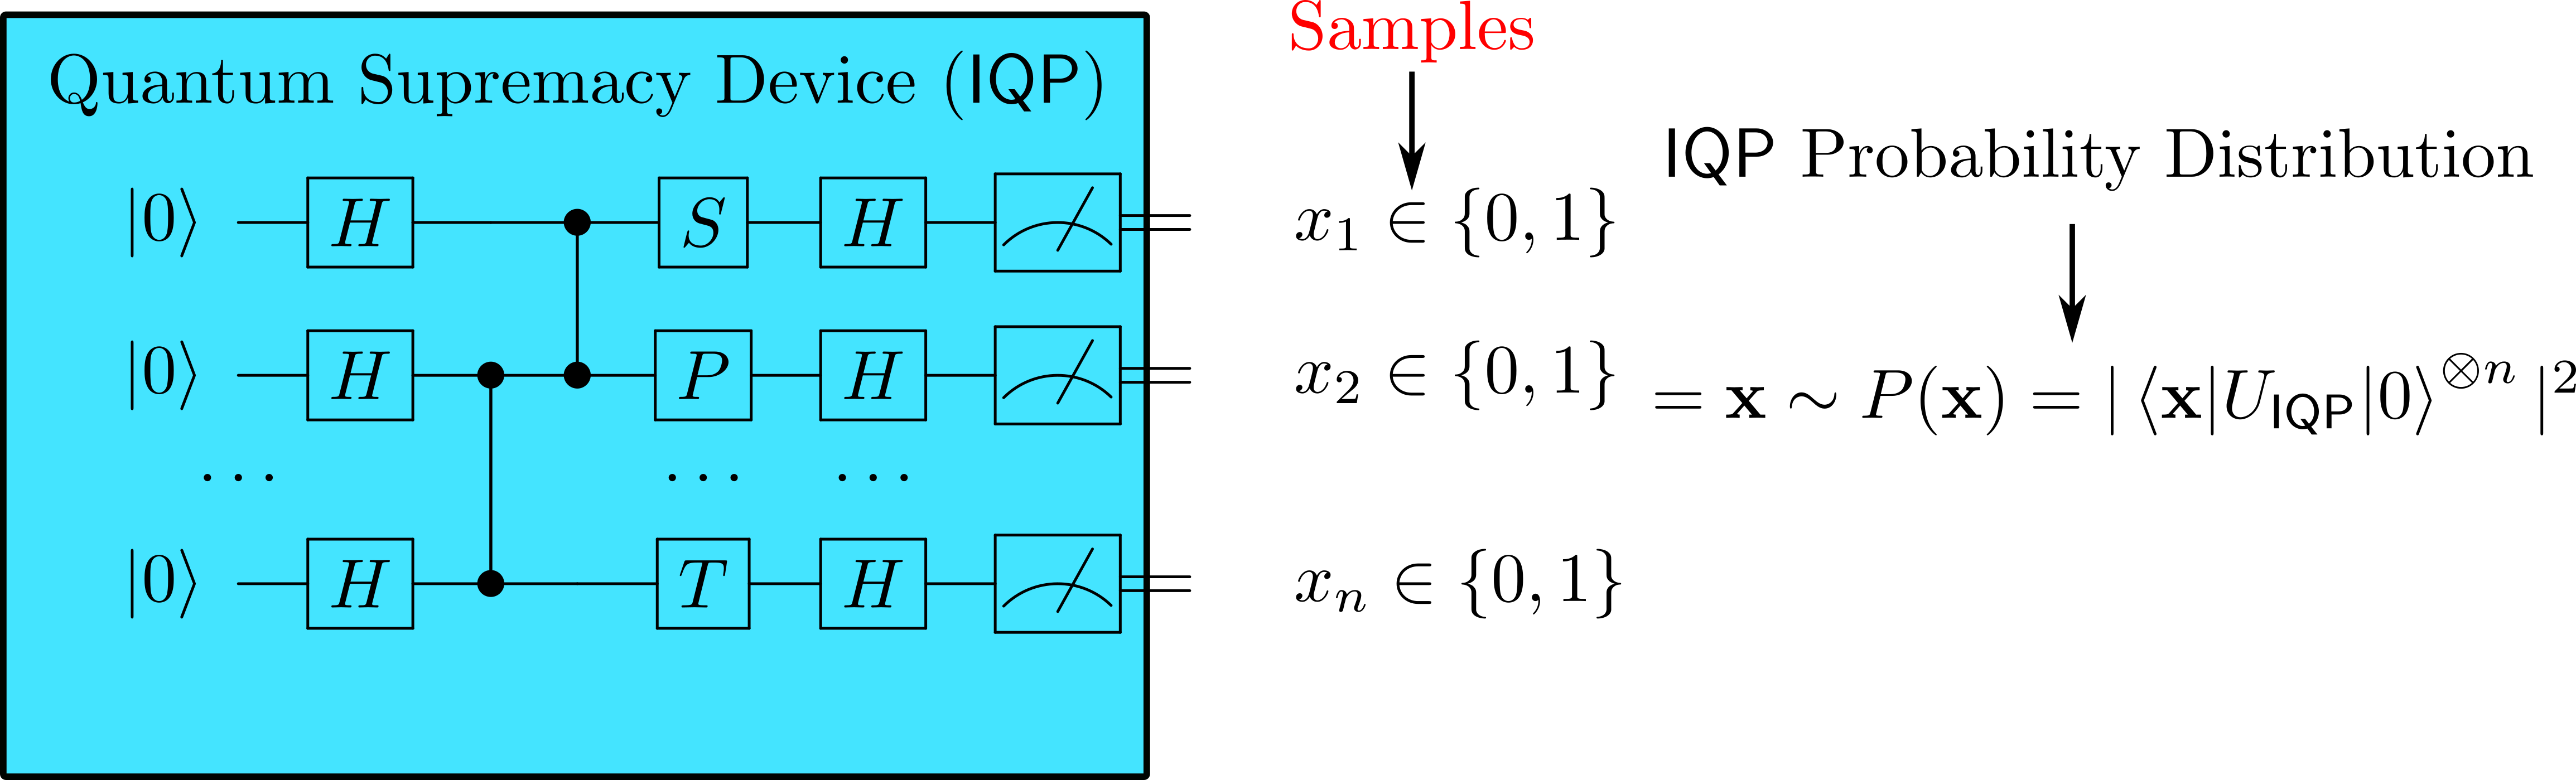

In [ ]:
qc_name = "5q-qvm" # Let's use a 5 qubit QVM this time, you can increase the number of qubits later
qc = get_qc(qc_name)
qubits = qc.qubits()

Each IQP computation begins with a layer of Hadamard gates on every qubit in the $|0\rangle$ state, just like in the random circuit sampling:

## <font color='red'>Task:</font> 
###  Apply a Hadamard to all qubits


In [ ]:
def iqp_circuit_prep(qubits):
    iqp_circuit = Program()

    iqp_circuit += # Add gates here
    return iqp_circuit


Next, we must apply gates which are **diagonal** in the computational basis. In other words, the matrix representation of these operations is diagonal in the Pauli-Z basis.

We only need two qubit gates in the form of the CZ gate:

\begin{align}
CZ = \left(\begin{array}{cc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{array}
\right)
\end{align}

As well as single qubits gates in the set:

\begin{align}
&\exp\left(i\frac{\theta\pi}{8} Z\right),\\
&\theta \in \{0, 1, 2, 3, 4, 5, 6, 7\}
\end{align}

where $T$ is defined above, $Z$ is the usual Pauli-Z and P...

All of these gates are diagonal, so they all commute with each other, meaning (for example) $[T, Z] = TZ - ZT = 0$

*Note: This commutation property is not true for general quantum computations, you cannot rearrange the order of a quantum circuit arbitrarily. For example, $[H, Z] \neq 0$ where H is the Hadamard gate.*

## <font color='red'>Task:</font>  

### Apply a layer of CZ gates to all pairs of qubits, followed by a random Z rotation on each qubit

*Hint: Because of the special structure of IQP circuits, we do not need to apply multiple single qubit gates on each qubit - since they all commute, we can just apply a single rotation on each around the Z axis. If more than one single qubit gate in the Z basis was applied, it could be absorbed into this single Z rotation, and would just change the rotation angle. *

For example, we choose a random Z rotation of $\pi/6$:
$R_z(1/6) = \left(\begin{array}{cc}
e^{-i\pi/12} & 0 &\\
0 & e^{i\pi/12} & \\
\end{array}
\right)$

Now imagine we applied another roation around $2\pi$:
$R_z(1) = \left(\begin{array}{cc}
e^{-i\pi} & 0 &\\
0 & e^{i\pi} & \\
\end{array}
\right)$
(Up to a phase this is the $Z$ gate)

If they are applied one after each other:
\begin{align}
R_z(1)R_z(1/6) = \left(\begin{array}{cc}
e^{-i\pi} & 0 &\\
0 & e^{i\pi} & \\
\end{array}
\right)\left(\begin{array}{cc}
e^{-i\pi/12} & 0 &\\
0 & e^{i\pi/12} & \\
\end{array}
\right) =
\left(\begin{array}{cc}
e^{-13i\pi/12} & 0 &\\
0 & e^{13i\pi/12} & \\
\end{array}
\right) = R_z(13/6)
\end{align}

*We should also have the two qubit gates being applied randomly, but we will ignore this here for simplicity*

In [ ]:
def iqp_circuit_diag(qubits):
    iqp_circuit = iqp_circuit_prep(qubits) # Initialise the Hadamards on all qubits
    
    angles = 1/8.*np.arange(0, 7, 1) # Random angles on single qubit gates

    iqp_circuit += # Add gates here


    return iqp_circuit


## <font color='red'>Task:</font> 
### To finish the circuit, apply a final layer of Hadamard gates to all qubits

In [ ]:
def iqp_circuit_final(qubits):
    iqp_circuit = iqp_circuit_diag(qubits)# Initialise Hadamards on all qubits and diagonal gates
   
    iqp_circuit += # Add gates here
    
    return iqp_circuit


## <font color='red'>Task:</font> 

### Measure all qubits in the computational basis as with RCS above:

In [ ]:
def iqp_circuit_measure(iqp_circuit, qubits, n_samples):
    n = len(qubits)
    ro = iqp_circuit.declare('ro', 'BIT',n)
    ## Insert code here to measure 
  
    samples = # Use 'run' not 'run_and_measure' here
    return samples


The previous cell will allow you to generate a sample from the output distribution of an IQP circuit. If this was done for a large enough problem size, and small enough error rate, it would be something a classical computer could not do even in the lifetime of the universe. The same thing would hold for the random circuit in the previous challenge.

## Now, let's have a look at the distribution

## <font color='green'>Task:</font> 

### Take the above IQP circuit, and plot a histogram showing the circuit outcomes and their relative probabilities

First you will need to compute the empirical probabilites of the IQP circuit.

You can put them into a dictionary to match the probabilites you get from the wavefunction simulator

In [ ]:
from collections import Counter

def empirical_dist(samples, N_qubits):
   
    N_samples = samples.shape[0]
    string_list = []  
    for sample in range(0, N_samples):
        string_list.append(''.join(map(str, samples[sample].tolist())))

    counts = Counter(string_list)

    for element in counts:
        counts[element] = counts[element]/(N_samples)

    sorted_samples_dict = {}

    keylist = sorted(counts)
    for key in keylist:
        sorted_samples_dict[key] = counts[key]

    return sorted_samples_dict

In [ ]:
iqp_empirical_dist = empirical_dist(samples, len(qubits))
iqp_circuit = iqp_circuit_final(qubits)
print(iqp_dist)

#Plot Data
x = np.arange(len(iqp_dist))        

plt.bar(x, iqp_dist.values(), width=0.3, align='center')
plt.xticks(range(len(iqp_dist)), list(iqp_dist.keys()),rotation=70)

plt.xlabel("Outcomes", fontsize=20)
plt.ylabel("Probabilities", fontsize=20)


### Generate the **exact** probabilities using the wavefunction simulator and plot again:


In [ ]:
with local_qvm():
    wf = make_wf.wavefunction(iqp_circuit)
iqp_exact_dist = wf.get_outcome_probs()

print('The exact circuit probabilities are: \n', exact_probs )
#Plot Data
x = np.arange(len(exact_probs))        
plt.bar(x, exact_probs.values(), width=0.3, align='center')

plt.xticks(range(len(exact_probs)), list(exact_probs.keys()),rotation=70)

plt.xlabel("Outcomes", fontsize=20)
plt.ylabel("Probabilities", fontsize=20)

## <font color='blue'>Task (Verification):</font>

### Try and compute the [total variation distance](https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures) between the sampled version (i.e. the empirical distribution, and the **real** probability distribution produced by the wavefunction simulator

The total variation distance between two discrete probability distributions, $p, q$ is given by:

\begin{align}
TV(p, q) = \frac{1}{2}\sum_{x} |p(x) - q(x)|
\end{align}

The total variation will give us a **measure** of how close the sampled version of the distribution outputted from the IQP circuit, to the **actual** one. 

A key question in Quantum Supremacy is how do we know we are sampling from the correct distribution? 

In other words, how do we know the quantum device is behaving properly and ***actually*** demonstrating Quantum Supremacy??

In [ ]:
def total_variation(empirical_dist, exact_dist):
    
    tv = # Compute here

    return tv



## <font color='red'>Task:</font>

### Now increase the number of samples, and observe what happens to the Total Variation

## Try increase the number of qubits.

How does increasing the number of samples we draw from the quantum circuit affect the computation of the total variation in this case?

*Hint: it should make a less noticable difference than in the previous case*

# Only attempt the following if you have left over time, and want to see a slightly different Supremacy proposal. Also see Dominik's slides from yesterday


## Challenge: Random Circuit Sampling


For simplicity, you just implement the original scheme proposed in https://arxiv.org/abs/1608.00263 (Alterations have been proposed since).

## <font color='red'>Task:</font> 
### Firstly, we apply Hadamard gates to all $n$ qubits:

In [ ]:
rcs_circuit = Program()

def hadamard_to_all(rcs_circuit, n):
    rcs_circuit += # Apply gates here
    
    return rcs_circuit

For an $n \times n$ grid, implement the following pattern of Control-Z gates, for 8 layers. The below shows a $6\times 6$ grid, where each dot represents a qubit, and each line is a $CZ$ gate.

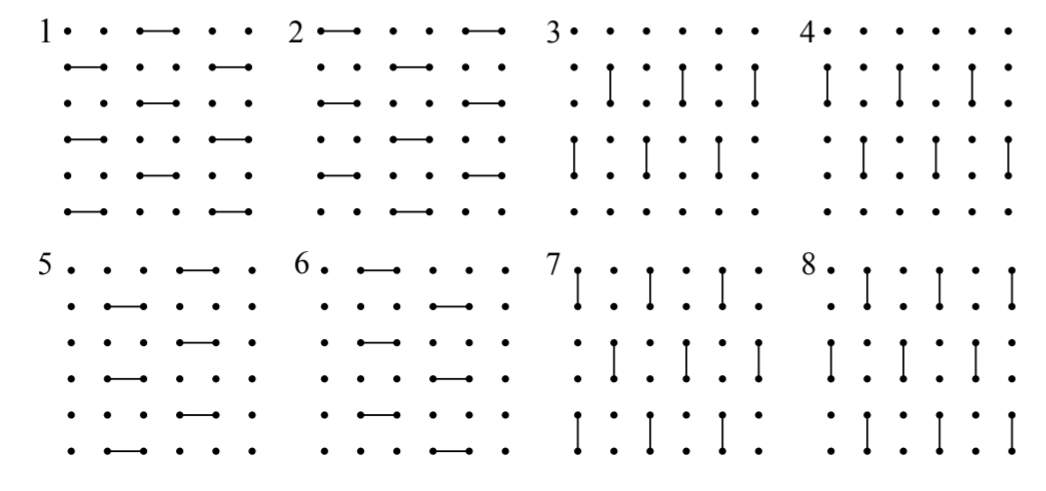

In [ ]:
circuit = Program()
def rcs_grid(circuit, n):
    circuit += # Add gates here
    return circuit

We must also implement $X^{1/2}, Y^{1/2}, T$ single qubit gates, where:
    
$X^{1/2} = \exp{i\frac{\pi}{4}\sigma_x}$
    
$X^{1/2} = \exp{i\frac{\pi}{4}\sigma_y}$
    
$T = \left(\begin{array}[cc]
            1 & 0\\
            0 & e^{i\pi/4} \end{array}
    \right)$

Now, for each layer, repeat the following steps:

1. Apply a layer of CZ gates, according to the structure above.
2. For every qubit which *does not* have a CZ acting on it during a layer, apply **at random** one of $X^{1/2}, Y^{1/2}, T$, subject to the following rules:
    + Only apply a single qubit gate on a qubit which has had a CZ in the previous layer
    + If it is the first time a qubit has had a single qubit gate applied (except the initial Hadamard), apply a T gate
    + Every gate at a qubit should be different from the one applied to it in the previous layer.
    
For computational simplicity, we can fix $n=2$, so the grid is $2\times 2 = 4$ qubits.

In [ ]:
circuit = Program()
qc_name = "4q-qvm"
qc = get_qc(qc_name)
qubits = qc.qubits()

def random_circuit_sampling_4(circuit, qubits):
    circuit += 
    return circuit



Now try repeating this for a $4\times 4 = 16 $ qubit grid.

In [ ]:
circuit = Program()
qc_name = "16q-qvm"
qc = get_qc(qc_name)
qubits = qc.qubits()

def random_circuit_sampling_16(circuit):
    circuit += 
    return circuit

## <font color='red'>Task:</font> 
### Finally, we will measure each qubit in the computational basis:

In [ ]:
rcs_4_circuit = Program()
qc_name = "4q-qvm"
qc = get_qc(qc_name)
qubits = qc.qubits()

rcs_4_circuit  = random_circuit_sampling_4(rcs_4_circuit , qubits)

def sampler(circuit, qubits):
    circuit += # Add appropriate measurements here
    return sample